In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
from pathlib import Path

dataset_path = os.listdir('/content/drive/MyDrive/Glaucoma_data')
print (dataset_path)  #what kinds of classes are in this dataset
print("Types of classes labels found: ", len(dataset_path))

Mounted at /content/drive
['normal', 'glaucoma', 'splits']
Types of classes labels found:  3


In [2]:
import pandas as pd

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Glaucoma_data' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                        image
0  normal  dataset_path/normal/231.jpg
1  normal  dataset_path/normal/255.jpg
2  normal  dataset_path/normal/249.jpg
3  normal  dataset_path/normal/256.jpg
4  normal  dataset_path/normal/253.jpg
        Labels                                image
2372  glaucoma  dataset_path/glaucoma/image_941.jpg
2373  glaucoma  dataset_path/glaucoma/image_915.jpg
2374  glaucoma  dataset_path/glaucoma/image_904.jpg
2375    splits  dataset_path/splits/train_split.npz
2376    splits   dataset_path/splits/test_split.npz


In [4]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2377
Labels
normal      1515
glaucoma     860
splits         2
Name: count, dtype: int64


In [5]:
import glob
import cv2 as cv
import numpy as np

path_to_normal = '/content/drive/MyDrive/Glaucoma_data/normal/*.jpg'
path_to_glaucoma = '/content/drive/MyDrive/Glaucoma_data/glaucoma/*.jpg'

IMG_SIZE = (224, 224)  # (width, height)

def read_and_preprocess(p):
    img = cv.imread(p)
    if img is None:
        return None
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE, interpolation=cv.INTER_AREA)
    img = img.astype(np.uint8)
    return img

normal_paths = glob.glob(path_to_normal)
glaucoma_paths = glob.glob(path_to_glaucoma)

normal_imgs = []
for p in normal_paths:
    im = read_and_preprocess(p)
    if im is not None:
        normal_imgs.append(im)

glaucoma_imgs = []
for p in glaucoma_paths:
    im = read_and_preprocess(p)
    if im is not None:
        glaucoma_imgs.append(im)

X_normal = np.stack(normal_imgs, axis=0)
X_glaucoma = np.stack(glaucoma_imgs, axis=0)

print("Normal:", X_normal.shape)
print("Glaucoma:", X_glaucoma.shape)

Normal: (1515, 224, 224)
Glaucoma: (858, 224, 224)


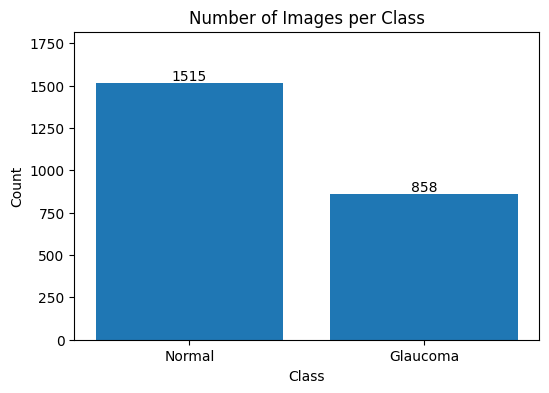

In [6]:
import matplotlib.pyplot as plt

labels = ["Normal", "Glaucoma"]
counts = [len(normal_imgs), len(glaucoma_imgs)]

plt.figure(figsize=(6,4))
plt.bar(labels, counts)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.ylim(0, max(counts)*1.2 if max(counts) > 0 else 1)
plt.show()

In [7]:
rng = np.random.default_rng(42)

idx_n = rng.permutation(len(normal_imgs))
normal_imgs = [normal_imgs[i] for i in idx_n]

idx_g = rng.permutation(len(glaucoma_imgs))
glaucoma_imgs = [glaucoma_imgs[i] for i in idx_g]

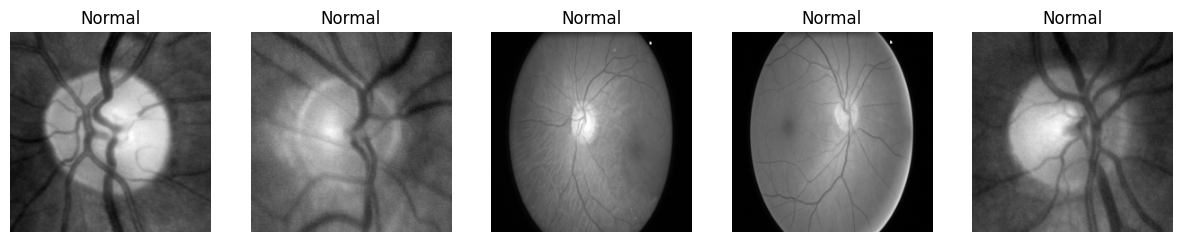

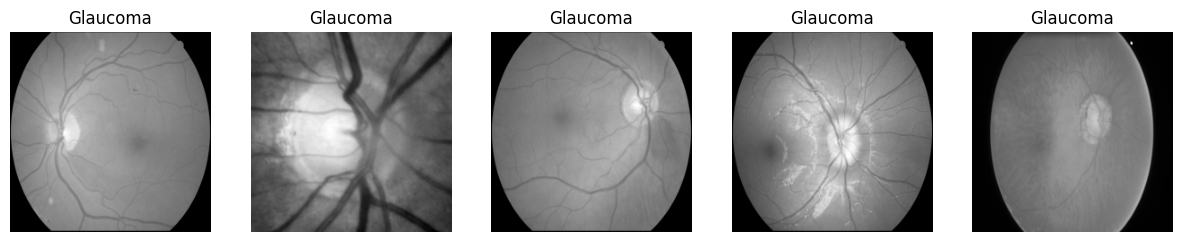

In [8]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = normal_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img, cmap='gray')
    plt.title("Normal")
    plt.axis('off')

num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = glaucoma_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img, cmap='gray')
    plt.title("Glaucoma")
    plt.axis('off')

In [9]:
y_normal = np.zeros(len(X_normal), dtype=np.int64)
y_glaucoma = np.ones(len(X_glaucoma), dtype=np.int64)

X = np.concatenate([X_normal, X_glaucoma], axis=0)
y = np.concatenate([y_normal, y_glaucoma], axis=0)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class balance:", np.bincount(y))
print("X dtype:", X.dtype)

X shape: (2373, 224, 224)
y shape: (2373,)
Class balance: [1515  858]
X dtype: uint8


In [10]:
SEED = 42
rng = np.random.default_rng(SEED)

idx = rng.permutation(len(y))
X = X[idx]
y = y[idx]

split = int(0.8 * len(y))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train:", X_train.shape, y_train.shape, "balance:", np.bincount(y_train))
print("Test :", X_test.shape,  y_test.shape,  "balance:", np.bincount(y_test))

Train: (1898, 224, 224) (1898,) balance: [1217  681]
Test : (475, 224, 224) (475,) balance: [298 177]


In [20]:
from pathlib import Path

SAVE_DIR = Path("/content/drive/MyDrive/Glaucoma_data/splits")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

np.savez_compressed(SAVE_DIR / "train_split.npz", X=X_train, y=y_train)
np.savez_compressed(SAVE_DIR / "test_split.npz",  X=X_test,  y=y_test)

print("Saved to:", SAVE_DIR)
print("Files:", list(SAVE_DIR.glob("*.npz")))

Saved to: /content/drive/MyDrive/Glaucoma_data/splits
Files: [PosixPath('/content/drive/MyDrive/Glaucoma_data/splits/train_split.npz'), PosixPath('/content/drive/MyDrive/Glaucoma_data/splits/test_split.npz')]
